<a href="https://colab.research.google.com/github/gauree812/NLP/blob/main/movie_reviews_seniment_analysis/Sentiment_Analysis_of_Movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Movie reviews



The sentiment labels are:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

## Exercise 1

In [43]:
##### Import necessary libraries
import pandas as pd

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


import re

1. Use the train.tsv dataset at https://www.kaggle.com/c/sentiment-analysis-onmovie-reviews/data


In [23]:
##### Read the zipped csv file
movie_df = pd.read_csv('/content/train.tsv (1).zip', sep='\t', compression='zip')
movie_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


2. Take a look at the data and get info about the data


In [24]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [25]:
movie_df.shape

(156060, 4)

In [26]:
movie_df.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

3. Count the number of expressed sentiments by category


In [27]:
movie_df['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

4. Provide a histogram of sentiments by category


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60a5ed9278>]],
      dtype=object)

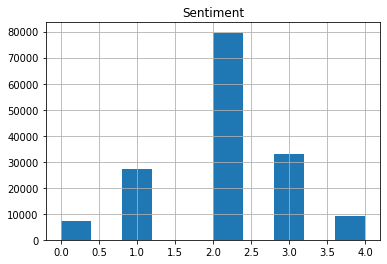

In [28]:
movie_df.hist('Sentiment')

5. Generate document term matrix by using scikit-learn's **CountVectorizer**. Tokenize
and remove symbols and numbers


In [30]:
def clean_text(phrase):
  text=re.sub("\\W"," ",phrase) # remove special chars
  tokens = re.split('\\s', text.lower())
  tokens = [token for token in tokens if re.match('\D', token)]
  return tokens

In [40]:
cv = CountVectorizer(analyzer=clean_text)
X_cv = cv.fit_transform(movie_df['Phrase'])
print(X_cv.shape)
print(X_cv[0])

(156060, 15125)
  (0, 0)	2
  (0, 11715)	1
  (0, 9101)	4
  (0, 4441)	1
  (0, 3353)	1
  (0, 13384)	3
  (0, 148)	1
  (0, 13382)	1
  (0, 14753)	1
  (0, 7085)	2
  (0, 5687)	2
  (0, 5188)	2
  (0, 5703)	1
  (0, 389)	1
  (0, 5461)	1
  (0, 12302)	1
  (0, 14770)	2
  (0, 9078)	1
  (0, 462)	1
  (0, 1740)	1
  (0, 8958)	1
  (0, 453)	1
  (0, 13560)	1
  (0, 8679)	1
  (0, 12735)	1


6. Split dataset (the test dataset represents 30% of the total data).


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_cv, movie_df['Sentiment'], test_size=0.3)

7. Import the MultinomialNB module and create a Multinomial Naive Bayes classifier object using MultinomialNB() function. Compute the model accuracy.


In [34]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_test = mnb.predict(X_test)
y_pred_train = mnb.predict(X_train)

In [35]:
print('Test accuracy score: {}' .format(accuracy_score(y_test, y_pred_test)))
print('Train accuracy score: {}' .format(accuracy_score(y_train, y_pred_train)))

Test accuracy score: 0.6103848946986202
Train accuracy score: 0.6767177459218982


8. **TF-IDF(Term Frequency-Inverse Document Frequency)** normalizes the
document term matrix. It is the product of TF and IDF. Word with high tf-idf in a
document, it is most of the times occurred in given documents and must be
absent in the other documents. So, the words must be a signature word. Use
TfidfVectorizer() for 'Phrase'.


In [42]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(movie_df['Phrase'])
print(X_tfidf.shape)
print(X_tfidf[0])

(156060, 15125)
  (0, 12735)	0.12678770652140067
  (0, 8679)	0.13425633366832057
  (0, 13560)	0.07551633764530875
  (0, 453)	0.21884443140973872
  (0, 8958)	0.18826469496971762
  (0, 1740)	0.10942207977901906
  (0, 462)	0.26121703075665453
  (0, 9078)	0.19140005186596154
  (0, 14770)	0.28462026859385586
  (0, 12302)	0.1370045121393805
  (0, 5461)	0.26357464344537446
  (0, 389)	0.16008883358496123
  (0, 5703)	0.2269253613590395
  (0, 5188)	0.20174720448396904
  (0, 5687)	0.2603359647072429
  (0, 7085)	0.17376458863008
  (0, 14753)	0.134309472702058
  (0, 13382)	0.0890742903865971
  (0, 148)	0.2490350286604832
  (0, 13384)	0.17542146593507515
  (0, 3353)	0.24642880874656695
  (0, 4441)	0.2762105337016567
  (0, 9101)	0.2683549259077713
  (0, 11715)	0.17472668303049782
  (0, 0)	0.1290226705971528


9. Split dataset by using function train_test_split(). You need to pass basically 3
parameters features, target, and test_set size. Additionally, you can use
random_state to select records randomly.
10. Build the Text Classification Model using TF-IDF.
11. First, import the MultinomialNB module and create the Multinomial Naive Bayes
classifier object using MultinomialNB() function.
12. Then, fit your model on a train set using fit() and perform prediction on the test
set using predict().

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, movie_df['Sentiment'], test_size = 0.3, random_state = 21)
mnb.fit(X_train, y_train)
y_pred_test = mnb.predict(X_test)
y_pred_train = mnb.predict(X_train)

In [38]:
print('Test accuracy score: {}' .format(accuracy_score(y_test, y_pred_test)))
print('Train accuracy score: {}' .format(accuracy_score(y_train, y_pred_train)))

Test accuracy score: 0.5812294416677346
Train accuracy score: 0.6298676333278409
